# Pandas
https://www.superdatascience.com/pages/python

In [1]:
import pandas as pd

In [2]:
import os.path
def path_base(base_name):
    current_dir = os.path.abspath(os.path.join(os.getcwd()))
    data_dir = current_dir.replace('notebook','data')
    data_base = data_dir + '\\' + base_name
    return data_base

In [4]:
stats = pd.read_csv(path_base('db_demographicdata.csv'))

In [5]:
print(type(stats))

<class 'pandas.core.frame.DataFrame'>


In [6]:
stats.shape

(195, 5)

In [7]:
len(stats)

195

In [8]:
len(stats.columns)

5

In [9]:
print(stats.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 5 columns):
Country Name      195 non-null object
Country Code      195 non-null object
Birth rate        195 non-null float64
Internet users    195 non-null float64
Income Group      195 non-null object
dtypes: float64(2), object(3)
memory usage: 7.7+ KB
None


In [10]:
stats.describe()

,Birth rate,Internet users
count,195.000000,195.000000
mean,21.469928,42.076471
std,10.605467,29.030788
min,7.900000,0.900000
25%,12.120500,14.520000
50%,19.680000,41.000000
75%,29.759500,66.225000
max,49.661000,96.546800


In [11]:
stats.head(3)

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income


In [12]:
stats.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Birth rate,195.0,21.469928,10.605467,7.9,12.1205,19.68,29.7595,49.6610
Internet users,195.0,42.076471,29.030788,0.9,14.5200,41.00,66.2250,96.5468


In [13]:
stats.columns

Index(['Country Name', 'Country Code', 'Birth rate', 'Internet users',
       'Income Group'],
      dtype='object')

# Renaming columns

In [14]:
stats.columns = ['CountryName', 'CountryCode', 'BirthRate', \
                 'InternetUsers',       'IncomeGroup']

In [15]:
stats.columns

Index(['CountryName', 'CountryCode', 'BirthRate', 'InternetUsers',
       'IncomeGroup'],
      dtype='object')

In [16]:
stats.head(2)

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income


# Subsetting DataFrames
Rows
Columns
Both

#### Rows

In [17]:
stats[2:4]

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income


In [18]:
stats[100:102]

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
100,Libya,LBY,21.425,16.5,Upper middle income
101,St. Lucia,LCA,15.430,46.2,Upper middle income


In [19]:
stats[193:]

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
193,Zambia,ZMB,40.471,15.4,Lower middle income
194,Zimbabwe,ZWE,35.715,18.5,Low income


In [20]:
# reverse Dataframe
stats[::-1].head(2)

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
194,Zimbabwe,ZWE,35.715,18.5,Low income
193,Zambia,ZMB,40.471,15.4,Lower middle income


In [21]:
# only every 50 lines
stats[::50].head(2)

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
0,Aruba,ABW,10.244,78.900000,High income
50,Ecuador,ECU,21.070,40.353684,Upper middle income


#### Columns

In [22]:
stats.CountryName.head(2)

0          Aruba
1    Afghanistan
Name: CountryName, dtype: object

In [23]:
stats['CountryName'].head(2)

0          Aruba
1    Afghanistan
Name: CountryName, dtype: object

In [24]:
stats[['CountryName','BirthRate']].head(2)

,CountryName,BirthRate
0,Aruba,10.244
1,Afghanistan,35.253


#### Both

In [25]:
stats[4:8][['CountryName','BirthRate']]

,CountryName,BirthRate
4,United Arab Emirates,11.044
5,Argentina,17.716
6,Armenia,13.308
7,Antigua and Barbuda,16.447


In [26]:
stats[['CountryName','BirthRate']][4:8]

,CountryName,BirthRate
4,United Arab Emirates,11.044
5,Argentina,17.716
6,Armenia,13.308
7,Antigua and Barbuda,16.447


# Basic operations

In [27]:
stats[['CountryCode','BirthRate','InternetUsers']][4:8]

,CountryCode,BirthRate,InternetUsers
4,ARE,11.044,88.0
5,ARG,17.716,59.9
6,ARM,13.308,41.9
7,ATG,16.447,63.4


In [28]:
result = stats.BirthRate*stats.InternetUsers

In [29]:
result.head(3)

0    808.2516
1    207.9927
2    878.3135
dtype: float64

In [30]:
type(result)

pandas.core.series.Series

#### add columns

In [31]:
stats['MyCalc'] = stats.BirthRate*stats.InternetUsers

In [32]:
stats.head(2)

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup,MyCalc
0,Aruba,ABW,10.244,78.9,High income,808.2516
1,Afghanistan,AFG,35.253,5.9,Low income,207.9927


In [33]:
stats = stats.drop('MyCalc',1)

In [34]:
stats.head(2)

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income


#### filtering

In [35]:
fil1 = stats.InternetUsers < 2

In [36]:
fil1.head(2)

0    False
1    False
Name: InternetUsers, dtype: bool

In [37]:
stats[fil1].head(2)

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
11,Burundi,BDI,44.151,1.3,Low income
52,Eritrea,ERI,34.800,0.9,Low income


In [38]:
fil2 = stats.BirthRate > 40

In [39]:
stats[fil2].head(2)

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
2,Angola,AGO,45.985,19.1,Upper middle income
11,Burundi,BDI,44.151,1.3,Low income


In [40]:
#stats[fil1 & fil2]
stats[(stats.InternetUsers < 2) & (stats.BirthRate > 40)]

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
11,Burundi,BDI,44.151,1.3,Low income
127,Niger,NER,49.661,1.7,Low income
156,Somalia,SOM,43.891,1.5,Low income


In [41]:
stats[stats.IncomeGroup=="High income"].head(3)

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
0,Aruba,ABW,10.244,78.9,High income
4,United Arab Emirates,ARE,11.044,88.0,High income
5,Argentina,ARG,17.716,59.9,High income


##### get theunique categories

In [42]:
stats.IncomeGroup.unique()

array(['High income', 'Low income', 'Upper middle income',
       'Lower middle income'], dtype=object)

In [43]:
stats[stats.CountryName == 'Malta']

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
116,Malta,MLT,9.5,68.9138,High income


## accessing individual elements
.at (near loc) for labels (even integers are treated as labels)  
.iat (near iloc) for integer location

In [44]:
print(stats.iat[0,1])
print(stats.iat[1,1])
print(stats.iat[1,4])
print(stats.iat[2,0])
print(stats.iloc[1,4])
print(stats.iloc[2,0])

ABW
AFG
Low income
Angola
Low income
Angola


In [45]:
stats.head(4)

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income


In [46]:
print(stats.at[0,'CountryCode'])
print(stats.at[1,'CountryCode'])
print(stats.at[1,'IncomeGroup'])
print(stats.at[2,'CountryName'])
print(stats.loc[1,'IncomeGroup'])
print(stats.loc[2,'CountryName'])

ABW
AFG
Low income
Angola
Low income
Angola


In [47]:
sub50 = stats[::50]

In [48]:
sub50

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
0,Aruba,ABW,10.244,78.900000,High income
50,Ecuador,ECU,21.070,40.353684,Upper middle income
100,Libya,LBY,21.425,16.500000,Upper middle income
150,Sudan,SDN,33.477,22.700000,Lower middle income


In [49]:
print(sub50.at[0,'CountryCode'])
#print(sub50.at[1,'CountryCode']) Error
#print(sub50.at[1,'IncomeGroup']) Error
#print(sub50.at[2,'CountryName']) Error
#print(sub50.loc[1,'IncomeGroup']) Error
#print(sub50.loc[2,'CountryName']) Error

ABW


In [50]:
print(sub50.at[0,'CountryCode'])
print(sub50.at[50,'CountryCode']) 
print(sub50.at[50,'IncomeGroup'])
print(sub50.at[100,'CountryName']) 
print(sub50.loc[50,'IncomeGroup']) 
print(sub50.loc[100,'CountryName']) 

ABW
ECU
Upper middle income
Libya
Upper middle income
Libya


## Seaborn
https://seaborn.pydata.org/examples/index.html

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

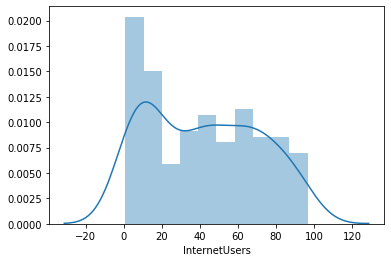

In [52]:
#distribution
vis1 = sns.distplot(stats['InternetUsers'],bins=10)

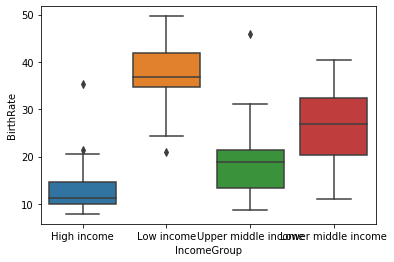

In [53]:
#distribution
vis2 = sns.boxplot(data = stats, x = 'IncomeGroup',y='BirthRate')

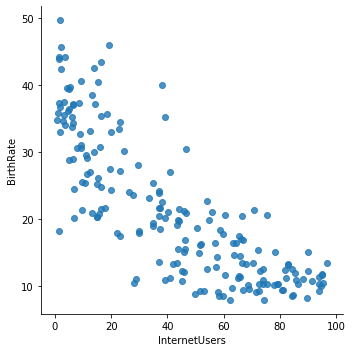

In [54]:
# linear Model
vis3 = sns.lmplot(data=stats, x='InternetUsers',y= 'BirthRate', fit_reg=False)

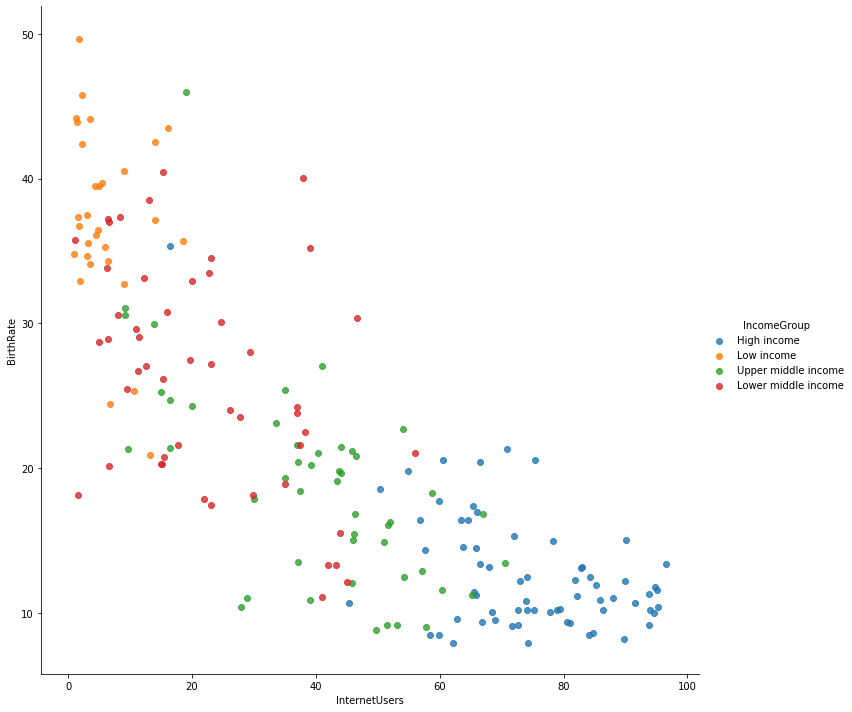

In [55]:
vis3 = sns.lmplot(data=stats, x='InternetUsers',y= 'BirthRate', \
                  fit_reg=False, hue='IncomeGroup',size =10)